In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
ppp = np.genfromtxt('/Users/arcturus/Documents/PhD/hobart2010/extracted.gps/traj_processing/ses1-ppp.txt',
                     skip_header = 22)
r2h2 = np.genfromtxt('/Users/arcturus/Documents/PhD/hobart2010/extracted.gps/traj_processing/ses1-hob2.txt',
                     skip_header = 22)
r2cam = np.genfromtxt('/Users/arcturus/Documents/PhD/hobart2010/extracted.gps/traj_processing/camb_2_ses_utm.txt',
                   skip_header = 22)

r2cam_track = np.genfromtxt('/Users/arcturus/Documents/PhD/hobart2010/extracted.gps/track/c2ses2.GEOD.SES1.LC',
                   skip_header = 3)

track_times = r2cam_track[:,2] + 345600


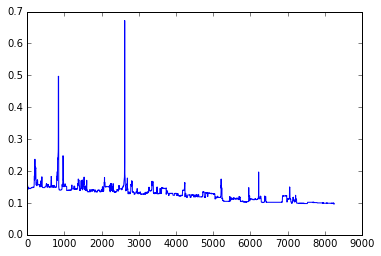

In [26]:
plt.plot(ppp[:,5], label = '')



In [23]:
imu_h2r2 = np.genfromtxt('/Users/arcturus/Documents/PhD/hobart2010/rtpostprocess.ins/r2h2/101014_034502_r2h2.3dp',
                         skip_header = 1)
imu_ppp = np.genfromtxt('/Users/arcturus/Documents/PhD/hobart2010/rtpostprocess.ins/ppp/mobile.3dp',
                         skip_header = 1)


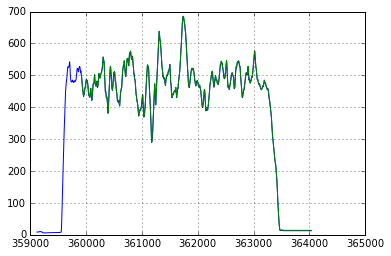

In [35]:
plt.plot(imu_ppp[:,0], imu_ppp[:,3], label = 'IMU + PPP height')
plt.plot(ppp[:,0],ppp[:,3], label = 'PPP height')
plt.grid()

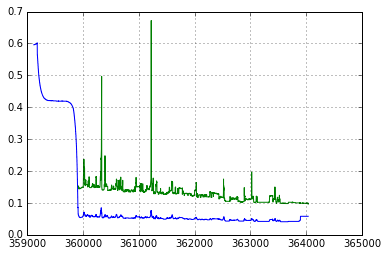

In [34]:
plt.plot(imu_ppp[:,0], imu_ppp[:,9], label = 'IMU + PPP height uncertainty')
plt.plot(ppp[:,0],ppp[:,5], label = 'PPP height uncertainty')
plt.grid()

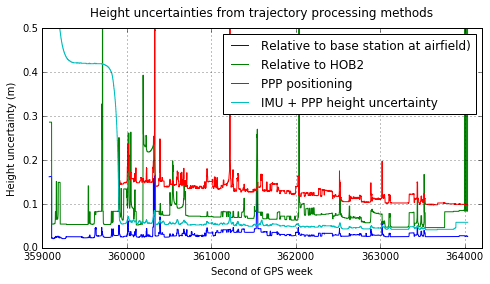

In [37]:
fig = plt.figure(figsize = ([20/2.54, 10/2.54]), dpi=300)

plt.plot(r2cam[:,0], r2cam[:,5], label='Relative to base station at airfield)')
plt.plot(r2h2[:,0], r2h2[:,5], label = 'Relative to HOB2')

plt.plot(ppp[:,0], ppp[:,5], label = 'PPP positioning')

plt.plot(imu_ppp[:,0], imu_ppp[:,9], label = 'IMU + PPP height uncertainty')

plt.grid()
plt.legend()
plt.ylim([0,0.5])
plt.ylabel('Height uncertainty (m)')
plt.xlabel('Second of GPS week')

plt.title('Height uncertainties from trajectory processing methods', y=1.03)
plt.xlim([359000, 364200])

plt.savefig('ch3_helo_pos_options.pdf', bbox_inches='tight')

In [38]:

min(ppp[:,0])

359912.0

In [39]:
min(track_times)

360950.0

In [40]:
min(r2h2[:,0])

359086.5

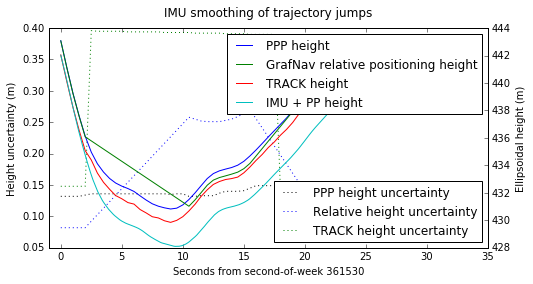

In [41]:

fig = plt.figure(figsize = ([20/2.54, 10/2.54]), dpi=300)


start = 361530
stop = 361560

imu_ppp_s = imu_ppp[(imu_ppp[:,0] > start) & (imu_ppp[:,0] < stop),:]
imu_h2r2_s = imu_h2r2[(imu_h2r2[:,0] > start) & (imu_h2r2[:,0] < stop),:]



ppp_s = ppp[(ppp[:,0] > start) & (ppp[:,0] < stop),:]
r2h2_s = r2h2[(r2h2[:,0] > start) & (r2h2[:,0] < stop),:]

t_s = np.where((track_times > start) & (track_times < stop))
t_s = t_s[0]

plt.plot(ppp_s[:,0]-min(ppp_s[:,0]), ppp_s[:,5], ':k', label= 'PPP height uncertainty')
ax01 = plt.gca()
ax01.plot(r2h2_s[:,0]-min(r2h2_s[:,0]), r2h2_s[:,5], ':b', label = 'Relative height uncertainty')
ax01.plot(track_times[t_s]-min(track_times[t_s]), r2cam_track[t_s,8]/100, ':g', label = 'TRACK height uncertainty')

ax01.set_ylabel('Height uncertainty (m)')
ax01.legend(loc=4)

ax0 = plt.twinx(ax01)

ax0.plot(ppp_s[:,0]-min(ppp_s[:,0]), ppp_s[:,3], label = 'PPP height')
ax0.plot(r2h2_s[:,0]-min(ppp_s[:,0]), r2h2_s[:,3], label = 'GrafNav relative positioning height')
ax0.plot(track_times[t_s]-min(track_times[t_s]), r2cam_track[t_s,5], label = 'TRACK height')

#ax0.plot(imu_ppp_s[:,0]-min(ppp_s[:,0]), imu_ppp_s[:,3]+1.097, label = 'IMU + PP height')

ax0.plot(imu_h2r2_s[:,0]-min(imu_h2r2_s[:,0]), imu_h2r2_s[:,3], label = 'IMU + PP height')




ax0.legend(loc=1)
ax0.set_ylabel('Ellipsoidal height (m)')
#ax0.grid()

ax01.set_xlabel('Seconds from second-of-week 361530')
ax01.set_title('IMU smoothing of trajectory jumps', y=1.03)

ax01.set_xlim([-1,35])

plt.savefig('ch3_IMU_trajfix.pdf', bbox_inches='tight')


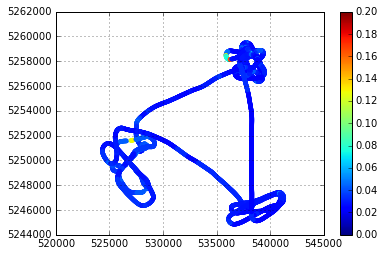

In [42]:
plt.scatter(r2cam[:,1], r2cam[:,2], c=r2cam[:,5], lw=0, vmin=0, vmax=0.2)
plt.colorbar()
plt.grid()

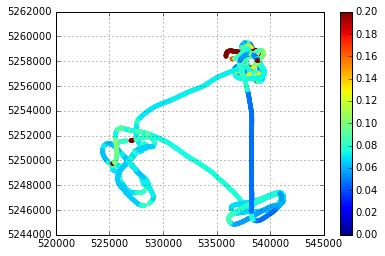

In [43]:
plt.scatter(r2h2[:,1], r2h2[:,2], c=r2h2[:,5], lw=0, vmin=0, vmax=0.2)
plt.colorbar()
plt.grid()

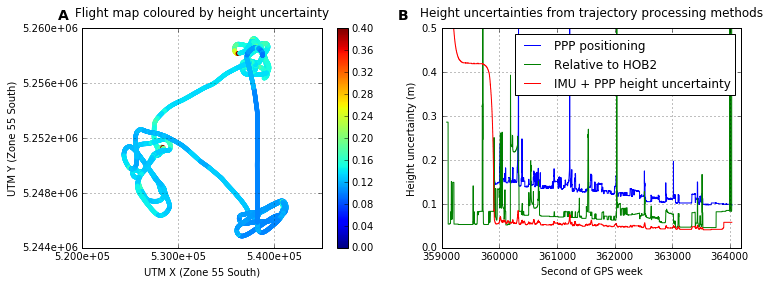

In [46]:
import matplotlib.ticker as mtick

fig = plt.figure(figsize = ([30/2.54, 10/2.54]), dpi=300)

ax0 = fig.add_subplot(1,2,1)
a0 = ax0.scatter(ppp[:,1], ppp[:,2], c=ppp[:,5], lw=0, vmin=0, vmax=0.4)
plt.colorbar(a0)


ax0.grid()
ax0.set_ylabel('UTM Y (Zone 55 South)')
ax0.set_xlabel('UTM X (Zone 55 South)')

ax0.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3e'))
ax0.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.3e'))

ax0.set_xticks(ax0.get_xticks()[::2])
ax0.set_yticks(ax0.get_yticks()[::2])

ax0.set_title('Flight map coloured by height uncertainty', y=1.03)
ax0.text(-0.08, 1.06,'A', ha='center', va='center', transform=ax0.transAxes, fontsize=14, weight='bold')



ax1 = fig.add_subplot(1,2,2)


ax1.plot(ppp[:,0] , ppp[:,5], label = 'PPP positioning')
ax1.plot(r2h2[:,0], r2h2[:,5], label = 'Relative to HOB2')
ax1.plot(imu_ppp[:,0], imu_ppp[:,9], label = 'IMU + PPP height uncertainty')


ax1.grid()
ax1.legend()
ax1.set_ylim([0,0.5])
ax1.set_ylabel('Height uncertainty (m)')
ax1.set_xlabel('Second of GPS week')

ax1.text(-0.13, 1.06,'B', ha='center', va='center', transform=ax1.transAxes, fontsize=14, weight='bold')

ax1.set_title('Height uncertainties from trajectory processing methods', y=1.03)
ax1.set_xlim([359000, 364200])

plt.savefig('ch3_gpsmethods.pdf', bbox_inches='tight')


